In [8]:
import pandas as pd
import numpy as np
from urllib.request import urlopen 
import json 

# plotly 라이브러리 
import plotly.io as pio
import plotly.express as px 
import plotly.graph_objects as go
import plotly.figure_factory as ff 
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

In [14]:
#산점도(Scatter Plot) 

iris = px.data.iris()

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


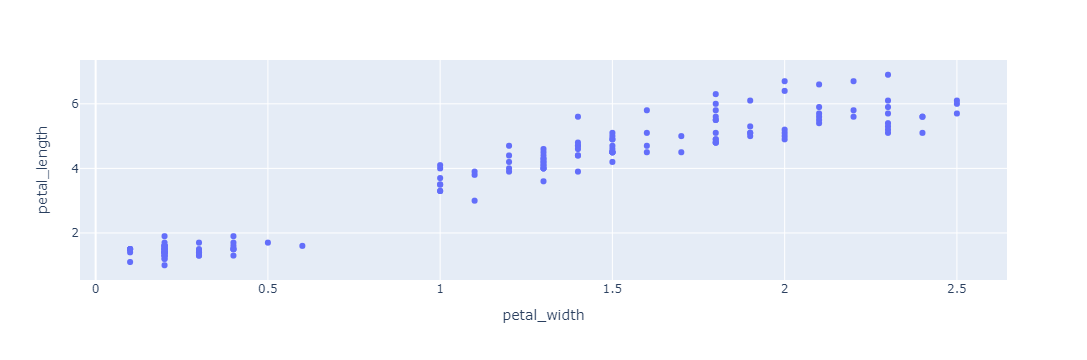

In [18]:
fig = px.scatter(iris, x='petal_width',y='petal_length')

fig.show()

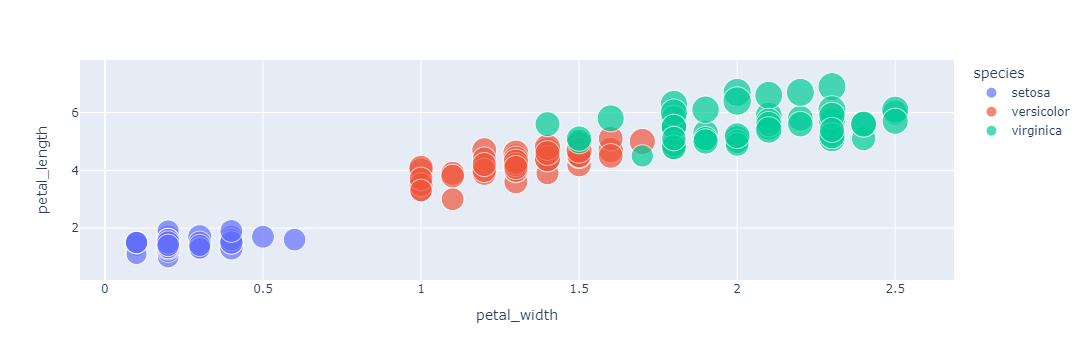

In [23]:
#fig의 color info추기 

fig = px.scatter(iris, x='petal_width',y='petal_length',color = 'species',#종에 따른 색을 구분
                size = 'sepal_length',# 사이즈 반영 
                hover_data = ['sepal_width']) # 마우스를 올렸을때 각 정보 로드
fig.show()

In [25]:
tips = px.data.tips()

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


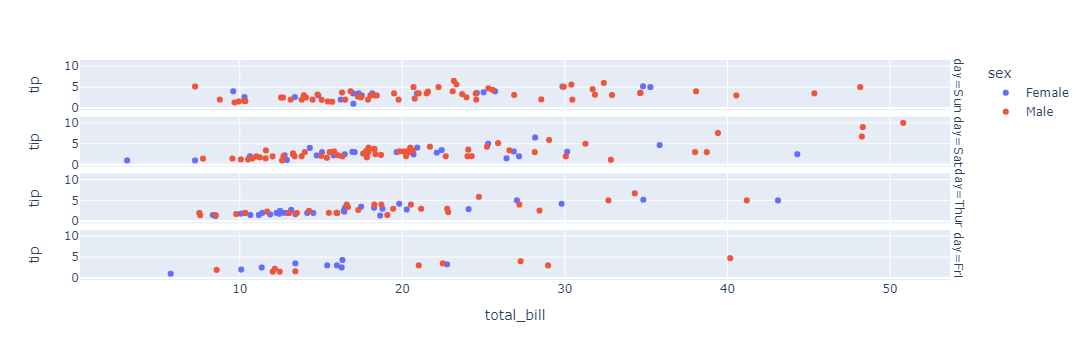

In [27]:
fig = px.scatter(tips, x='total_bill',y='tip',color='sex',facet_row='day')
fig.show()

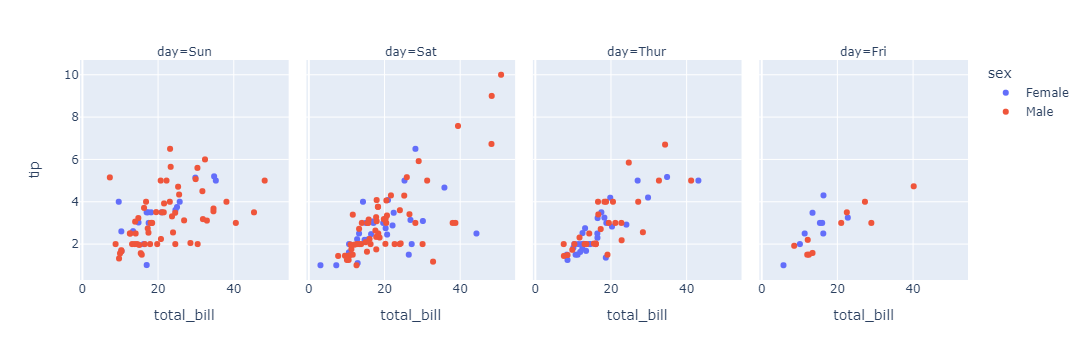

In [30]:
fig = px.scatter(tips, x='total_bill',y='tip',color='sex',facet_col='day')
fig.show()

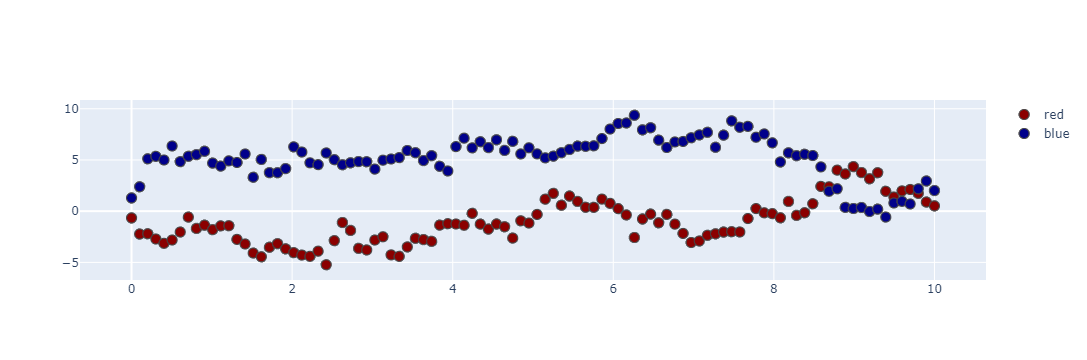

In [33]:
t = np.linspace(0,10,100)

y1= np.random.randn(100).cumsum()
y2= np.random.randn(100).cumsum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=t,y=y1, name='red',mode='markers',marker_color='darkred'))
fig.add_trace(go.Scatter(x=t,y=y2, name='blue',mode='markers',marker_color='darkblue'))
fig.update_traces(mode='markers',marker_line_width=1,marker_size=10)
fig.show()

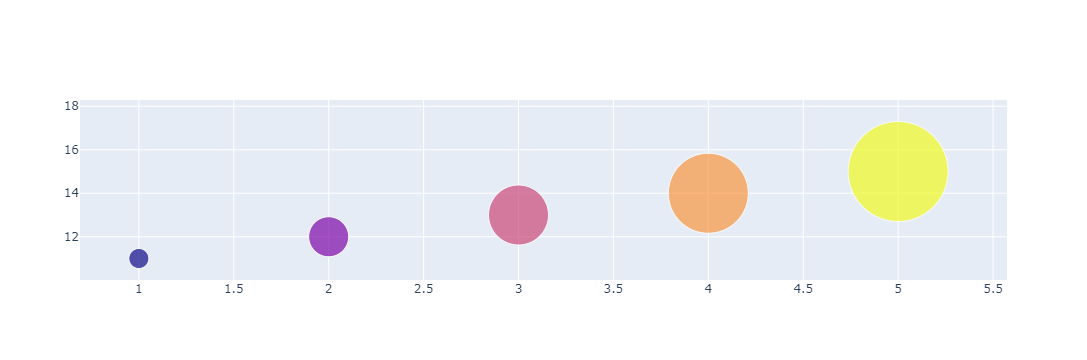

In [37]:
fig = go.Figure(data=go.Scatter(x=[1,2,3,4,5],
                                y=[11,12,13,14,15],
                                mode='markers',
                                marker=dict(size=[20,40,60,80,100],
                                            color=[1,2,3,4,5])))

fig.show()

In [50]:
gapminder = px.data.gapminder()

gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


In [55]:
gapminder_2007 = gapminder.query("year==2007")

In [57]:
gapminder_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


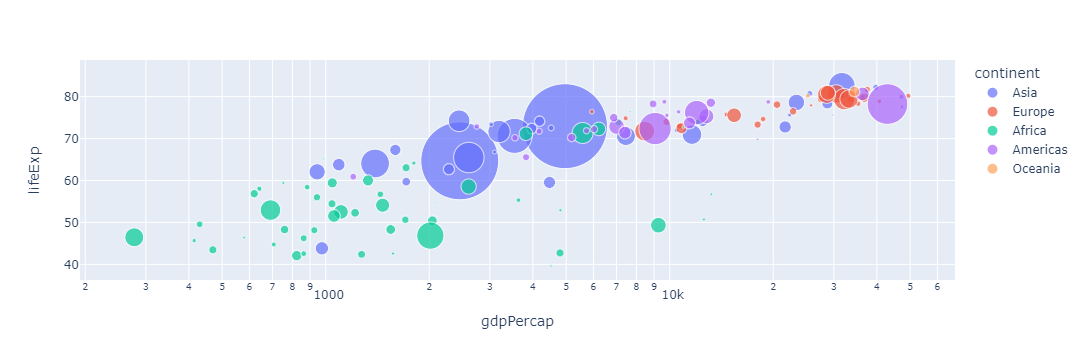

In [62]:
fig = px.scatter(gapminder_2007,
                 x='gdpPercap',y='lifeExp',
                 size='pop',color='continent',#대륙별 색 구분 인구수에 따른 산점도 크기 조절
                 hover_name = 'country',log_x=True , size_max=60)
fig.show()

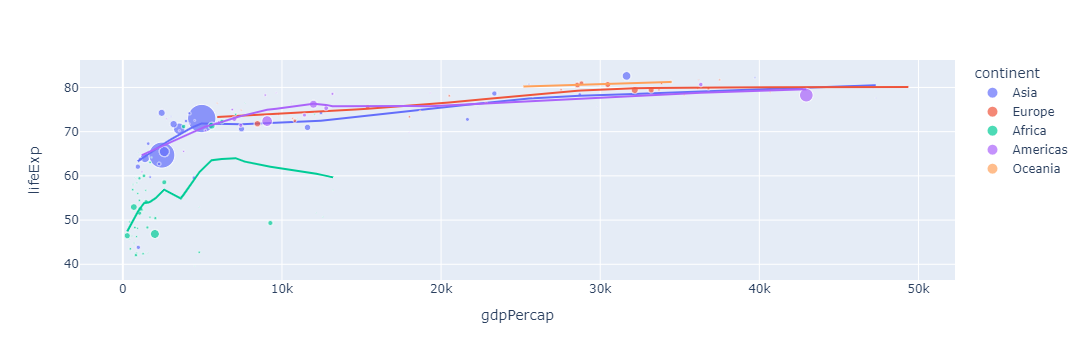

In [67]:
fig = px.scatter(gapminder_2007,
                 x='gdpPercap',y='lifeExp',
                 size='pop',color='continent',trendline ='lowess')
fig.show() #트렌드 라인 추가

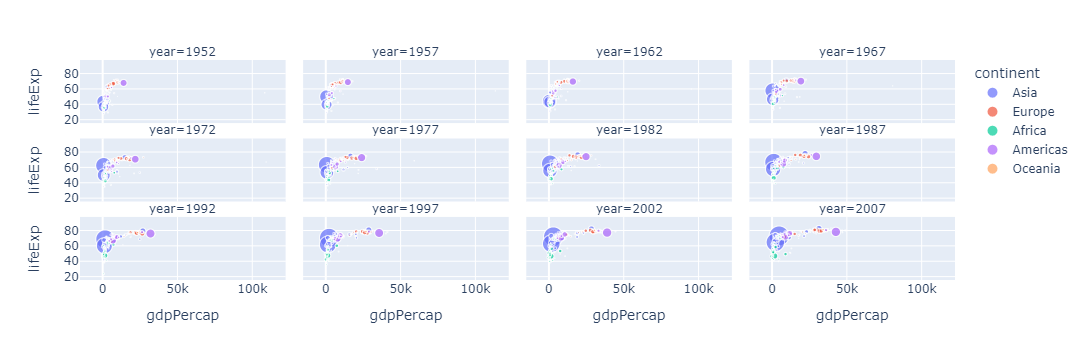

In [70]:
fig = px.scatter(gapminder,
                 x='gdpPercap',y='lifeExp',
                  size='pop',color='continent',
                 facet_col='year',facet_col_wrap=4) #연도에 따른 산점도 차트를 4개의 열로만 기준으로 연속된 형태만 출력
fig.show() 

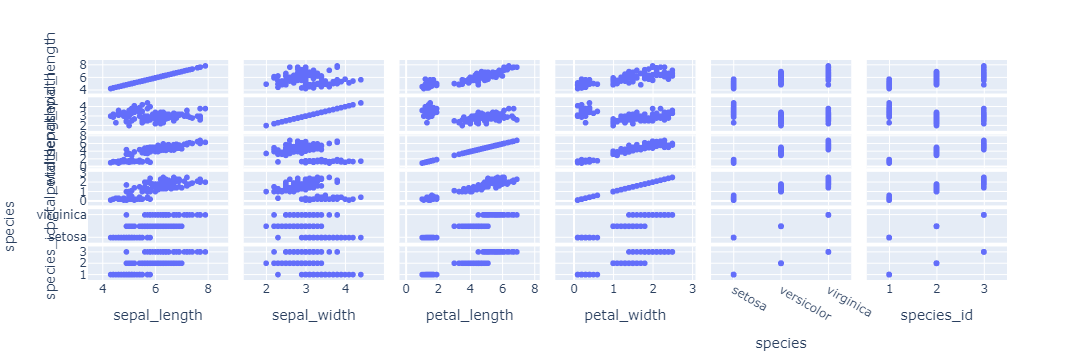

In [73]:
# 산점도 매트릭스(Scatter Matrix) 

fig = px.scatter_matrix(iris)
fig.show()

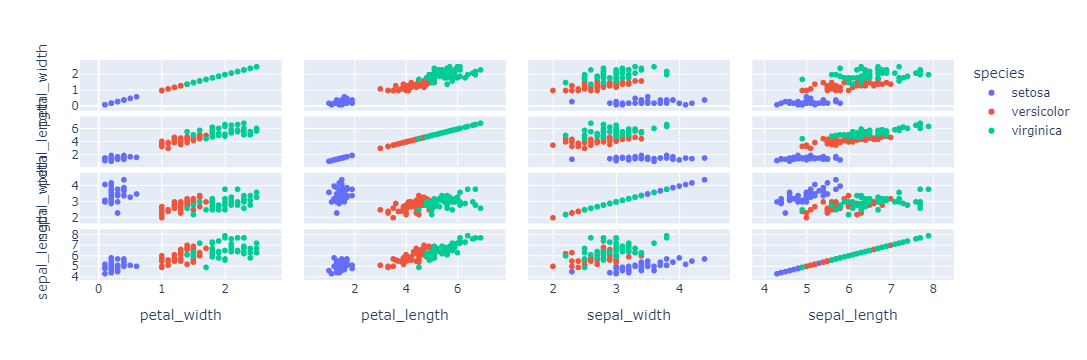

In [75]:
fig = px.scatter_matrix(iris,
                       dimensions=['petal_width','petal_length',
                                   'sepal_width','sepal_length'],
                       color='species')
fig.show()

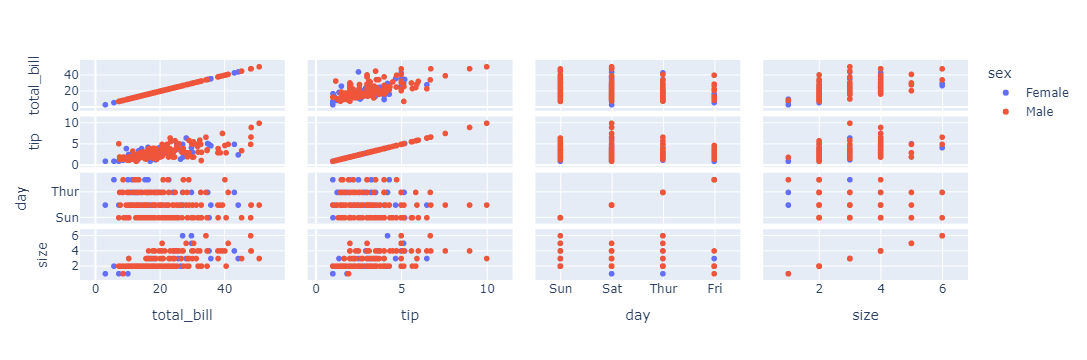

In [78]:
fig = px.scatter_matrix(tips,
                         dimensions=['total_bill','tip','day','size'],
                        color= 'sex')
fig.show()

In [79]:
#line plot(라인플롯) 

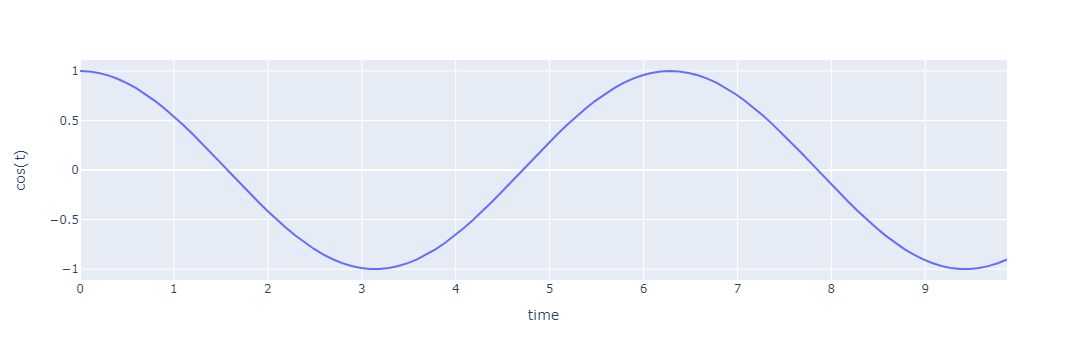

In [84]:
t = np.linspace(0,np.pi**2,100)

fig=px.line(x=t ,y=np.cos(t),labels={'x':'time','y':'cos(t)'})
fig.show() #코사인 값이 라인을 그려준다 

In [90]:
gapminder_aisa = gapminder.query("continent=='Asia'")


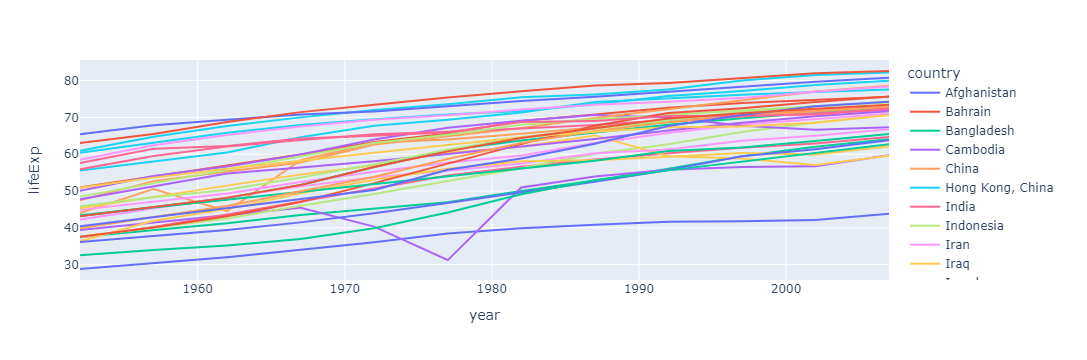

In [93]:
fig = px.line(gapminder_aisa, x='year',y='lifeExp',color ='country')
fig.show()

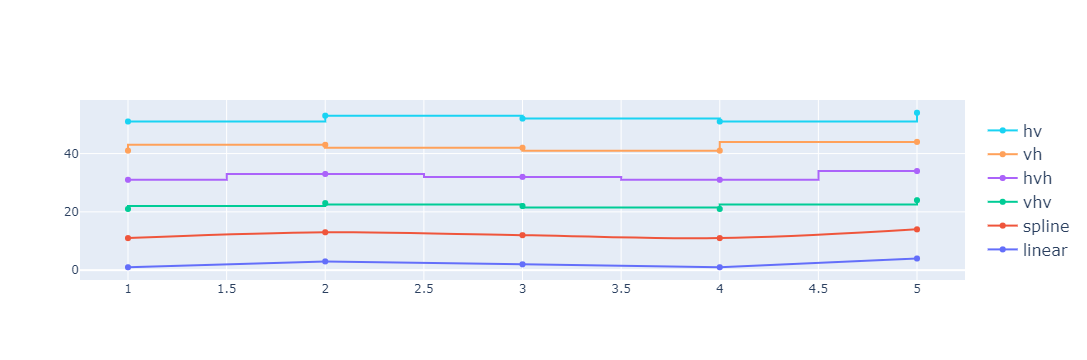

In [96]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,2,1,4])

fig=go.Figure()
fig.add_trace(go.Scatter(x=x,y=y,name='linear',line_shape='linear'))
fig.add_trace(go.Scatter(x=x,y=y+10 ,name='spline',hoverinfo='text+name',line_shape= 'spline'))
fig.add_trace(go.Scatter(x=x,y=y+20,name='vhv',line_shape='vhv'))
fig.add_trace(go.Scatter(x=x,y=y+30,name='hvh',line_shape='hvh'))
fig.add_trace(go.Scatter(x=x,y=y+40,name='vh',line_shape='vh'))
fig.add_trace(go.Scatter(x=x,y=y+50,name='hv',line_shape='hv'))
fig.update_traces(hoverinfo="text+name",mode="lines+markers")
fig.update_layout(legend=dict(y=0.5,traceorder='reversed',font_size =16))
fig.show()

In [106]:
N = 100
x = np.linspace(0,1,N)
y0 = np.random.randn(N) + 5
y1 = np.random.randn(N)
y2 = np.random.randn(N) - 5

fig=go.Figure()
fig.add_trace(go.Scatter(x=x,y=0,mode='markers',name='markers'))
fig.add_trace(go.Scatter(x=x,y=1,mode='lines+markers',name='lines+markers'))
fig.add_trace(go.Scatter(x=x,y=2,mode='lines',name='lines'))

fig.show()


ValueError: 
    Invalid value of type 'builtins.int' received for the 'y' property of scatter
        Received value: 0

    The 'y' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [123]:
#시계열

url= 'https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv'
appl = pd.read_csv(url)
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           506 non-null    object 
 1   AAPL.Open      506 non-null    float64
 2   AAPL.High      506 non-null    float64
 3   AAPL.Low       506 non-null    float64
 4   AAPL.Close     506 non-null    float64
 5   AAPL.Volume    506 non-null    int64  
 6   AAPL.Adjusted  506 non-null    float64
 7   dn             506 non-null    float64
 8   mavg           506 non-null    float64
 9   up             506 non-null    float64
 10  direction      506 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.6+ KB


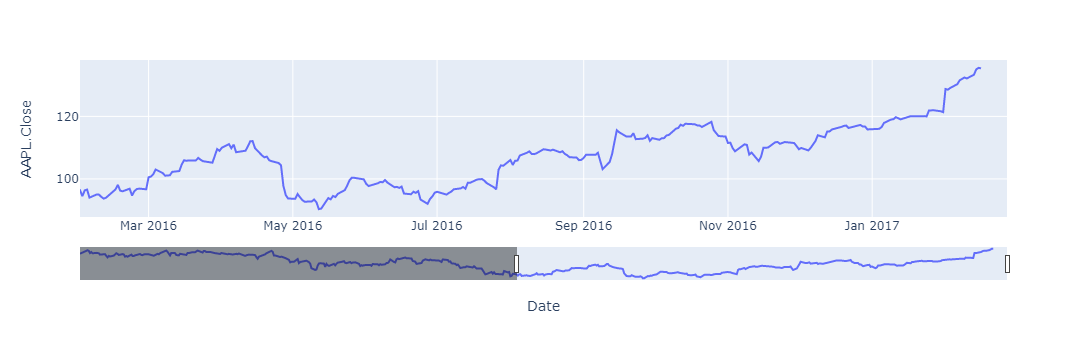

In [128]:
fig = px.line(appl,x='Date',y='AAPL.Close',range_x=['2016-02-01','2017-02-27']) #애플 주가의 종가라인 #range_x=['2016-02-01','2017-02-27']) 일부 구간만 
fig.update_xaxes(rangeslider_visible=True) #구간별 슬라이더 추가 
fig.show()

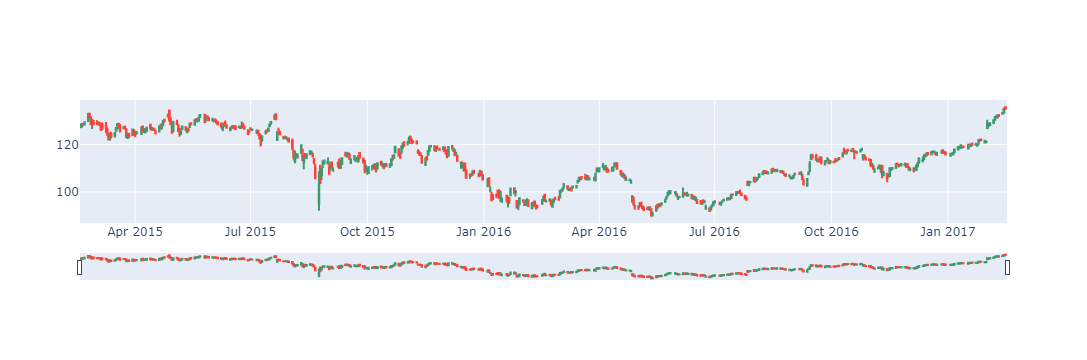

In [132]:
fig =go.Figure(data=[go.Candlestick(x=appl['Date'],
                                    open=appl['AAPL.Open'],
                                    high=appl['AAPL.High'],
                                    low=appl['AAPL.Low'],
                                    close=appl['AAPL.Close'])])
fig.show()

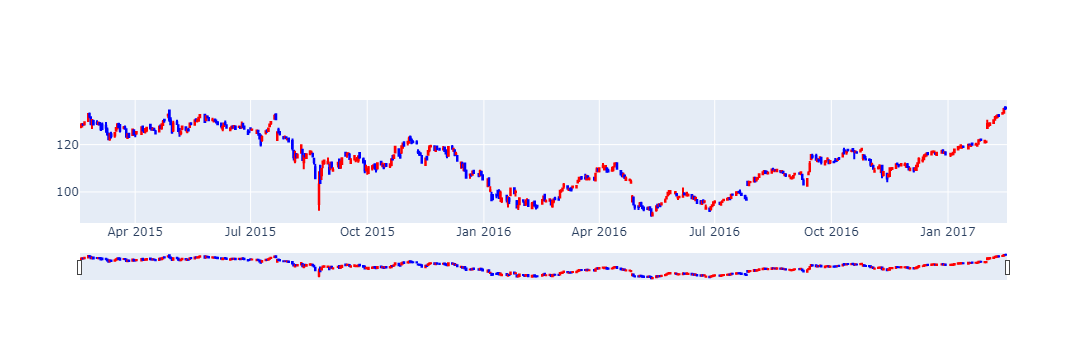

In [136]:
fig =go.Figure(data=[go.Candlestick(x=appl['Date'],
                                    open=appl['AAPL.Open'],
                                    high=appl['AAPL.High'],
                                    low=appl['AAPL.Low'],
                                    close=appl['AAPL.Close'],
                                   increasing_line_color = 'red',
                                   decreasing_line_color='blue')]) #한국식 주식 차트를 위하여 상승 빨간 하락 파랑으로 만들기
fig.show()

In [137]:
#면적도(Area Plots) 

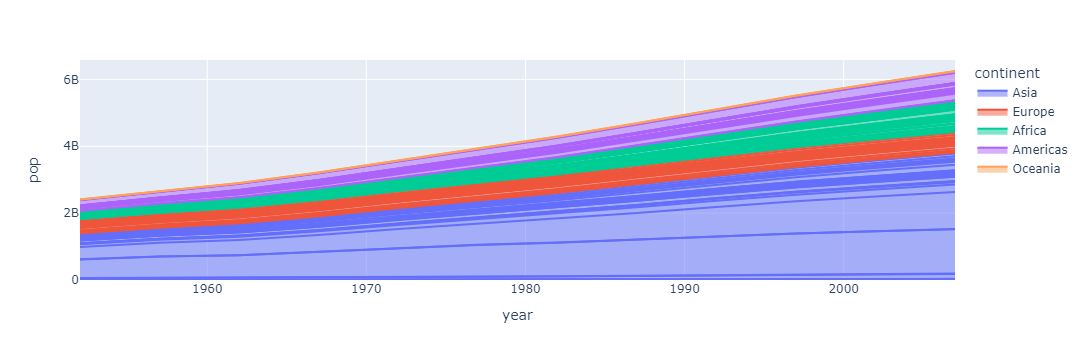

In [140]:
fig = px.area(gapminder, x= 'year',y='pop',
              color = 'continent', line_group= 'country')
fig.show()

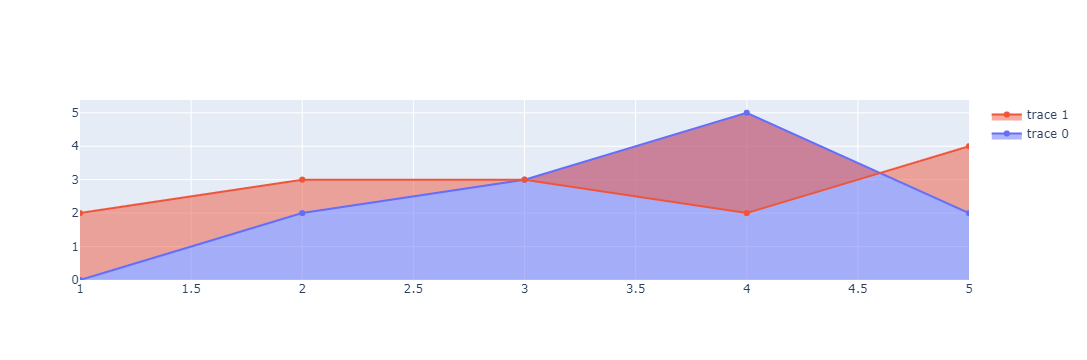

In [144]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5],y=[0,2,3,5,2],fill='tozeroy'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5],y=[2,3,3,2,4],fill='tonexty'))
fig.show()


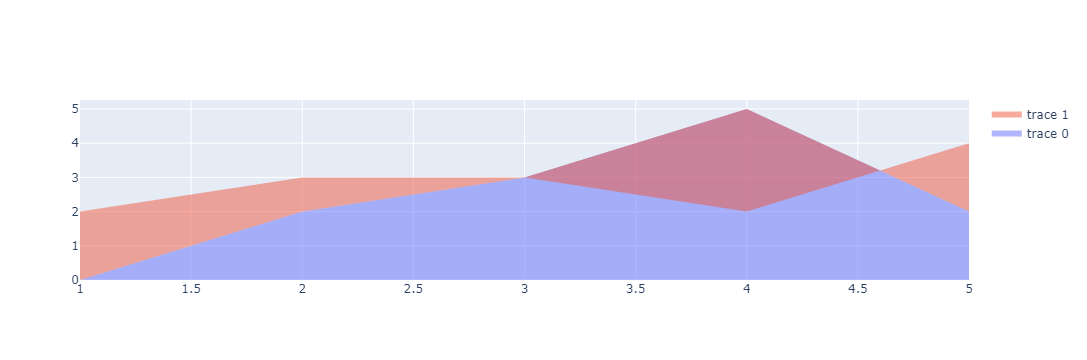

In [146]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5],y=[0,2,3,5,2],
                         fill='tozeroy',mode = 'none'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5],y=[2,3,3,2,4],
                         fill='tonexty',mode = 'none'))
fig.show()


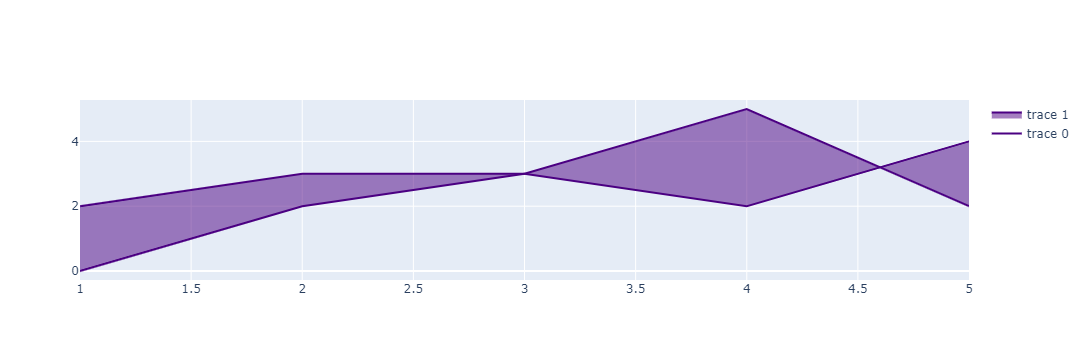

In [149]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=[1,2,3,4,5],y=[0,2,3,5,2],
                         fill='none',mode = 'lines',line_color='indigo'))
fig.add_trace(go.Scatter(x=[1,2,3,4,5],y=[2,3,3,2,4],
                         fill='tonexty',mode = 'lines',line_color='indigo'))
fig.show()


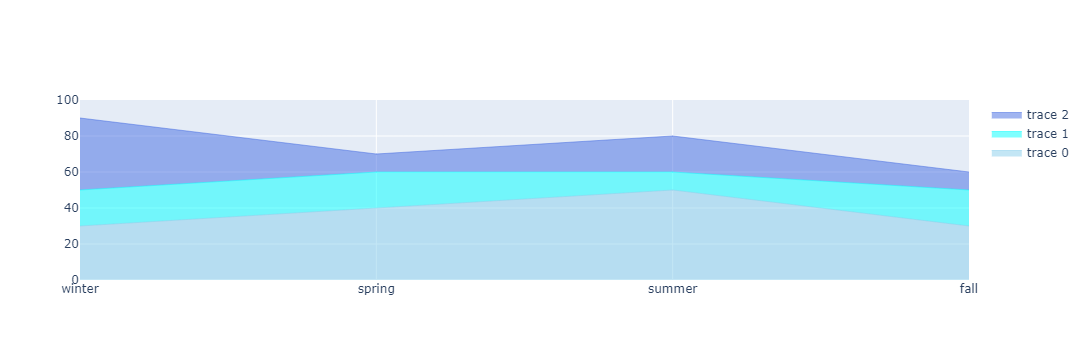

In [158]:
x= ['winter','spring','summer','fall']

fig =go.Figure()
fig.add_trace(go.Scatter(x=x,y=[30,40,50,30],
                   hoverinfo='x+y',
                   mode='lines',
                   line=dict(width=0.5,color='skyblue'),
                   stackgroup='one'))
fig.add_trace(go.Scatter(x=x,y=[20,20,10,20],
                   hoverinfo='x+y',
                   mode='lines',
                   line=dict(width=0.5,color='cyan'),
                   stackgroup='one'))
fig.add_trace(go.Scatter(x=x,y=[40,10,20,10],
                   hoverinfo='x+y',
                   mode='lines',
                   line=dict(width=0.5,color='royalblue'),
                   stackgroup='one'))

fig.update_layout(yaxis_range=(0,100))
fig.show()

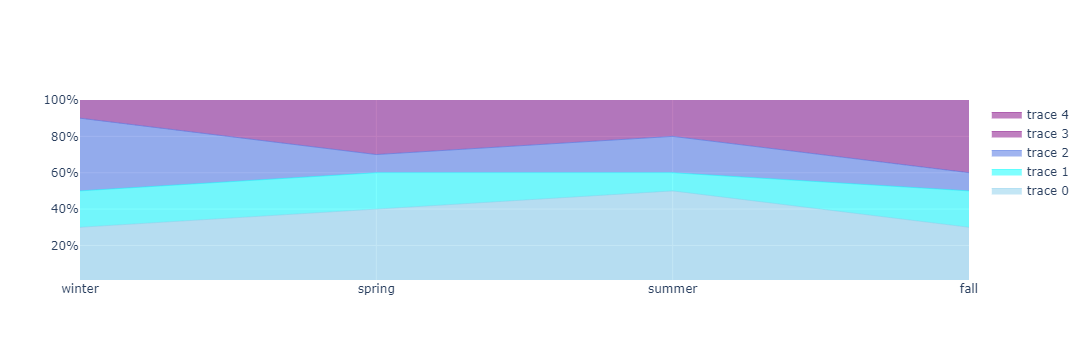

In [160]:
fig.add_trace(go.Scatter(x=x,y=[100,100,100,100],
                   hoverinfo='x+y',
                   mode='lines',
                   line=dict(width=0.5,color='purple'),
                   stackgroup='one'))

fig.update_layout(showlegend=True,
                 xaxis_type='category',
                 yaxis=dict(type='linear',
                           range=[1,100],
                           ticksuffix='%'))
fig.show()

In [162]:
#막대 차트(Bar Charts) 

In [165]:
gapminder_korea = gapminder.query("country == 'Korea, Rep.'")

gapminder_korea

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226,KOR,410
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537,KOR,410
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387,KOR,410
843,"Korea, Rep.",Asia,1967,57.716,30131000,2029.228142,KOR,410
844,"Korea, Rep.",Asia,1972,62.612,33505000,3030.876650,KOR,410
845,"Korea, Rep.",Asia,1977,64.766,36436000,4657.221020,KOR,410
846,"Korea, Rep.",Asia,1982,67.123,39326000,5622.942464,KOR,410
847,"Korea, Rep.",Asia,1987,69.810,41622000,8533.088805,KOR,410
848,"Korea, Rep.",Asia,1992,72.244,43805450,12104.278720,KOR,410
849,"Korea, Rep.",Asia,1997,74.647,46173816,15993.527960,KOR,410


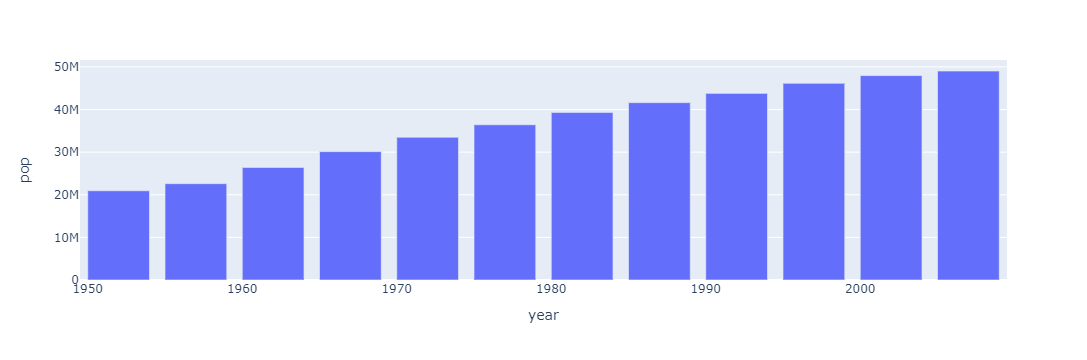

In [168]:
fig = px.bar(gapminder_korea, x='year',y='pop')
fig.show()

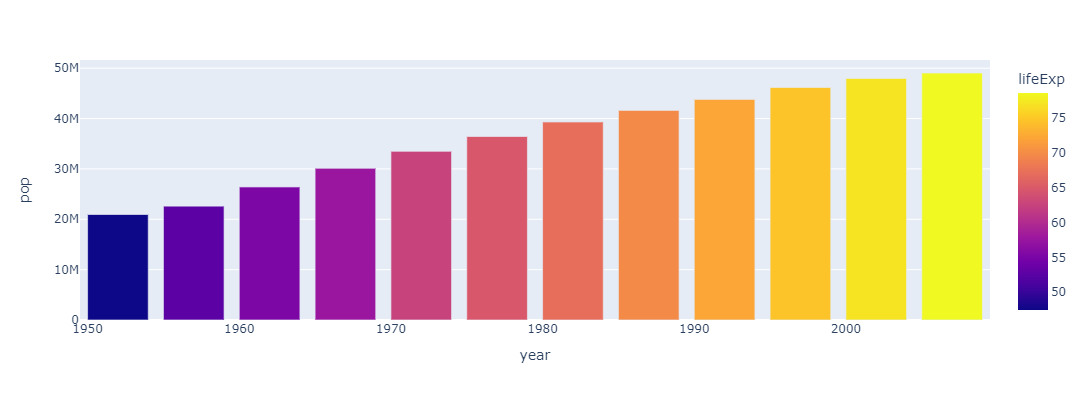

In [171]:
fig = px.bar(gapminder_korea, x='year',y='pop',
            hover_data=['lifeExp','gdpPercap'],
            color='lifeExp',height=400)
fig.show()

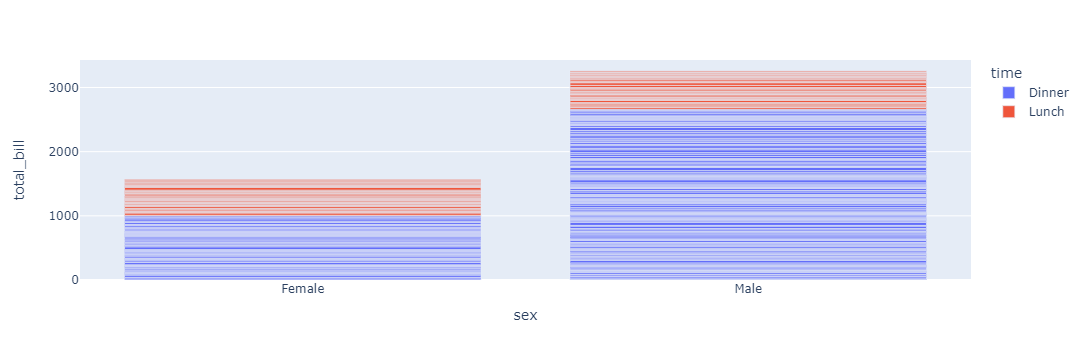

In [173]:
fig = px.bar(tips,x='sex',y='total_bill',color='time')
fig.show()

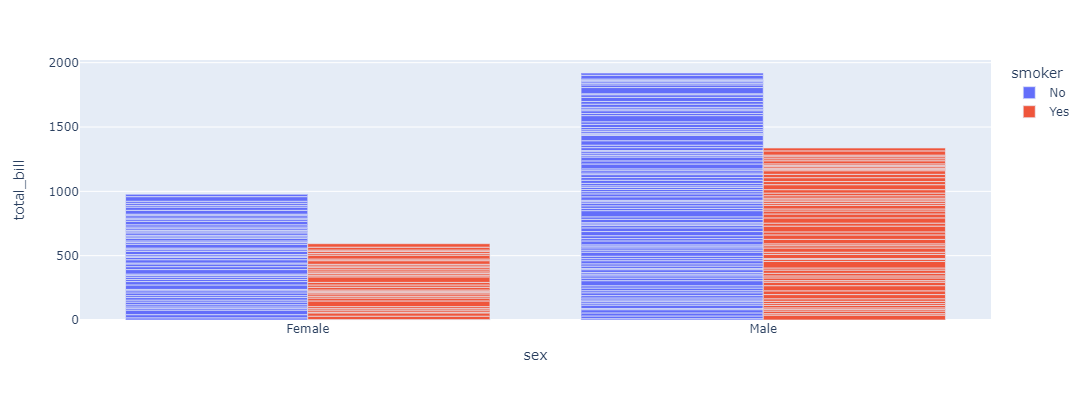

In [175]:
fig = px.bar(tips,x='sex',y='total_bill',color='smoker',
            barmode='group',
            height=400)
fig.show()

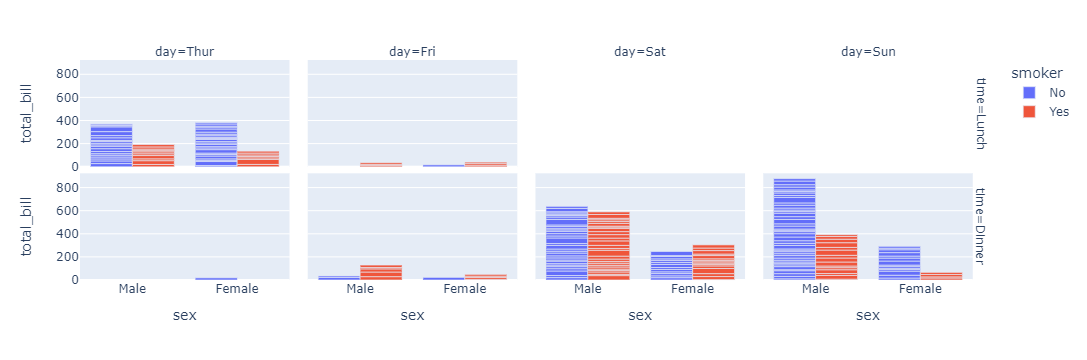

In [179]:
fig = px.bar(tips,x='sex',y='total_bill',color='smoker',
            barmode='group',
             facet_row='time',facet_col='day',
             category_orders={'day':['Thur','Fri','Sat','Sun'],
                              'time':['Lunch','Dinner']})
fig.show()

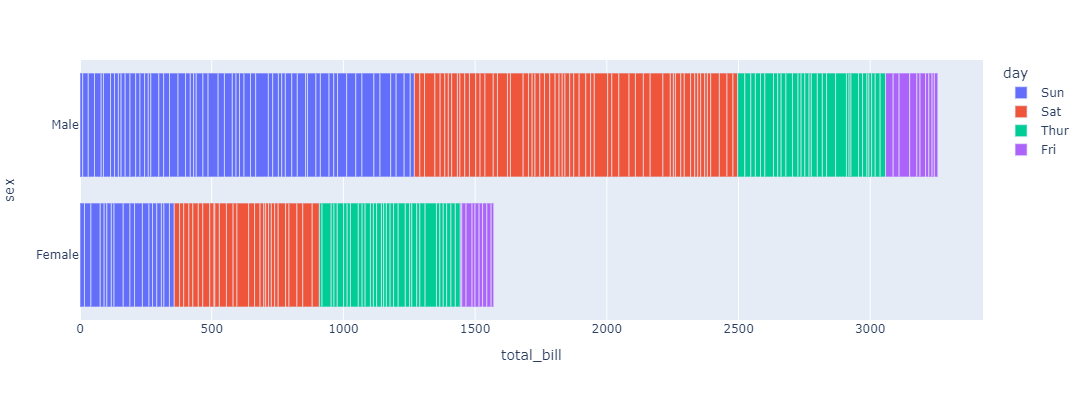

In [184]:
fig = px.bar(tips,x='total_bill',y='sex',color='day',orientation='h',
            hover_data=['tip','size'],
            height=400)
fig.show()

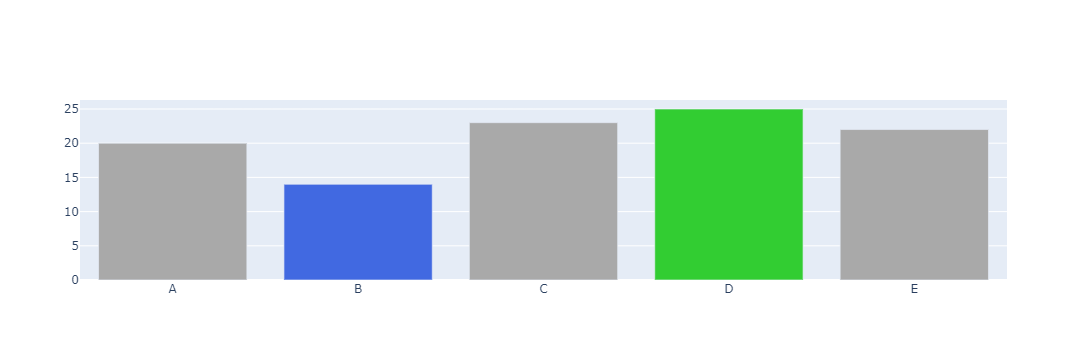

In [193]:
colors = ['darkgray',] * 5
colors[1] = 'royalblue'
colors[3] = 'limegreen'

fig = go.Figure(data=[go.Bar(x=['A','B','C','D','E'],
                             y=[20,14,23,25,22],
                             marker_color=colors)])
fig.update_layout()
                

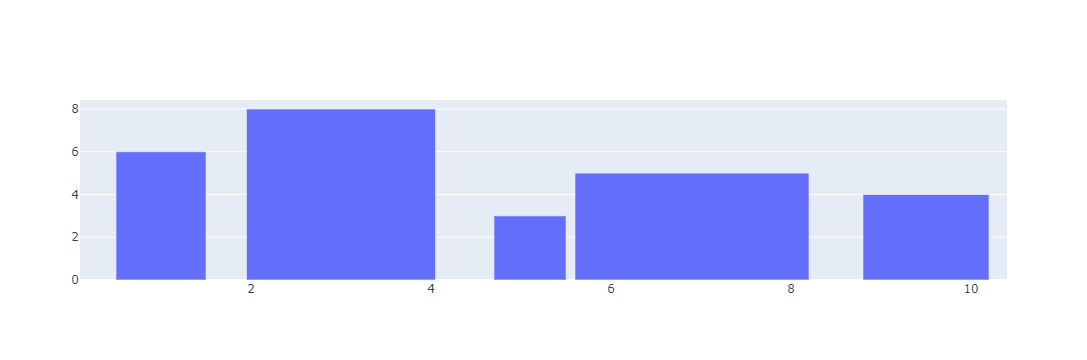

In [197]:
fig = go.Figure(data=[go.Bar(x=[1,3,5.1,6.9,9.5],
                             y=[6,8,3,5,4],
                             width=[1,2.1,0.8,2.6,1.4])])
fig.show()